<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>PRÁCTICA 3</h2>
</div>

# Reto de clasificación y predicción
El presente reto consiste en la elaboración de un modelo de clasificación que sea capaz de asignar un conjuntos de valores dados a sus respectiva variable. Además el modelo debe ser capáz de predecir el valor de una variable (Retraso en la llegada) con los datos que se tienen.  

## 1. Análisis exploratorio

Inicialmente, se importan las librerías que permitirán un análisis exploratorio detallado de las variables contenidas en la base de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import sklearn as sk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/train_airlines_delay_challenge (1).csv')

#### Vista incial de la base de datos
Una vez importadas las librerías y la base de datos, se continúa con la visualiazión general de los componentes de esta.

In [ ]:
print (df.head())

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2009-09-05         AA               2062    MIA  BOS        1055.0   
1  2009-05-08         XE               2926    IAH  ELP        2115.0   
2  2009-03-16         OH               6433    CVG  DSM        1430.0   
3  2009-03-04         OO               5439    LAX  SBA         820.0   
4  2009-06-12         WN                615    LAS  MCI        1235.0   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  ARR_DELAY  \
0    1139.0       44.0      15.0      1154.0        1405.0       30.0   
1    2112.0       -3.0      17.0      2129.0        2219.0      -15.0   
2    1425.0       -5.0      25.0      1450.0        1518.0        7.0   
3     814.0       -6.0      15.0       829.0         905.0      -11.0   
4    1234.0       -1.0      13.0      1247.0        1735.0      -26.0   

   CRS_ELAPSED_TIME  DISTANCE  
0             190.0    1258.0  
1             124.0     667.0  
2             108.0     50

#### Conteos en las variables que componen la base de datos

In [ ]:
total = len(df)
conteos = df.notna().sum()
ceros = (df == 0).sum()
resultado = pd.DataFrame({
    'Total': total,
    'Con valor': conteos,
    'Valor 0': ceros
})
print(resultado)

                     Total  Con valor  Valor 0
FL_DATE            9000000    9000000        0
OP_CARRIER         9000000    9000000        0
OP_CARRIER_FL_NUM  9000000    9000000        0
ORIGIN             9000000    9000000        0
DEST               9000000    9000000        0
CRS_DEP_TIME       9000000    9000000        0
DEP_TIME           9000000    9000000        0
DEP_DELAY          9000000    9000000   547973
TAXI_OUT           9000000    9000000        0
WHEELS_OFF         9000000    9000000        0
CRS_ARR_TIME       9000000    9000000        0
ARR_DELAY          9000000    9000000   211818
CRS_ELAPSED_TIME   9000000    9000000        0
DISTANCE           9000000    9000000        0


In [ ]:
duplicados = df[df.duplicated(keep=False)]

print (duplicados)

            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
13       2009-09-18         UA                402    MCI  ORD        1450.0   
37       2009-09-12         UA                650    ORD  IAD        2145.0   
89       2009-09-30         WN               2040    ORF  BWI        1430.0   
105      2009-09-07         OH               6615    JFK  PIT         820.0   
150      2009-09-27         WN                 26    CRP  HOU        1145.0   
...             ...        ...                ...    ...  ...           ...   
2999736  2011-06-06         EV               5546    GSP  ATL        1523.0   
2999737  2011-06-12         WN               3296    STL  PHX         810.0   
2999852  2011-06-12         AA               2255    OMA  DFW        1900.0   
2999887  2011-06-11         WN               3994    LAS  SMF        1040.0   
2999950  2011-06-27         WN               3154    MCO  MHT        2030.0   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF 

In [ ]:
df['OP_CARRIER_FL_NUM'].value_counts()

,count
OP_CARRIER_FL_NUM,
16,5326
12,5091
403,5042
407,4937
15,4863
...,...
8994,1
8520,1
8101,1


In [ ]:
df['OP_CARRIER'].value_counts()

,count
OP_CARRIER,
WN,1797926
DL,1161883
AA,964037
OO,911078
EV,741999
UA,705030
MQ,464337
US,432815
B6,363733


In [ ]:
df['TAXI_OUT'].value_counts()

,count
TAXI_OUT,
11.0,722735
12.0,706926
10.0,697457
13.0,663230
9.0,609023
...,...
285.0,1
219.0,1
182.0,1


#### Generación de gráficos generales
Todas las columnas serán de utilidad para el procesamiento de los datos y la generación del modelo, sin embargo, para fines del análisis exploratorio. Se elegirán a criterio las columnas de mayor peso para la predicción.

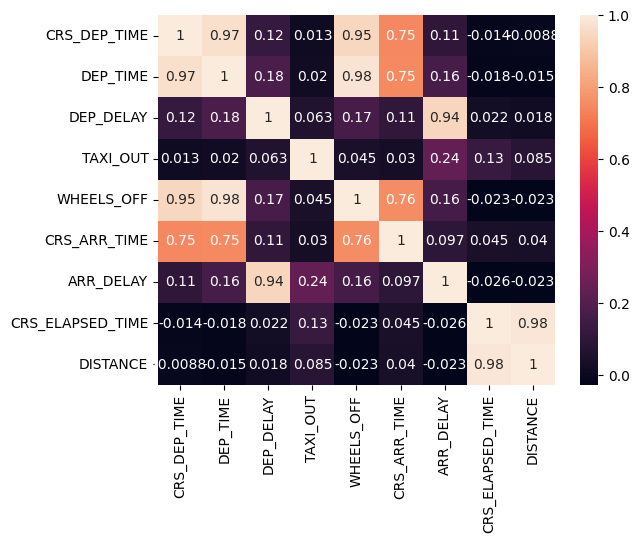

In [ ]:
columnas = df[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE']]
columnasnan = columnas.dropna()

cor = columnasnan.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
media_arr_delay = df['ARR_DELAY'].mean()
media_dep_delay = df['DEP_DELAY'].mean()
proporcion = media_arr_delay / media_dep_delay
print(f"Proporción ARR_DELAY/DEP_DELAY: {proporcion}")

Proporción ARR_DELAY/DEP_DELAY: 0.524006891451514


Text(0, 0.5, 'Frecuencia')

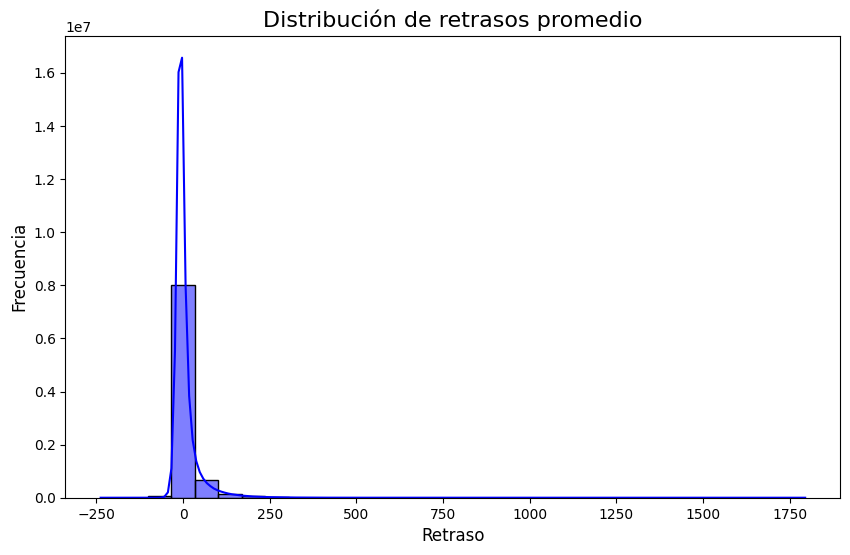

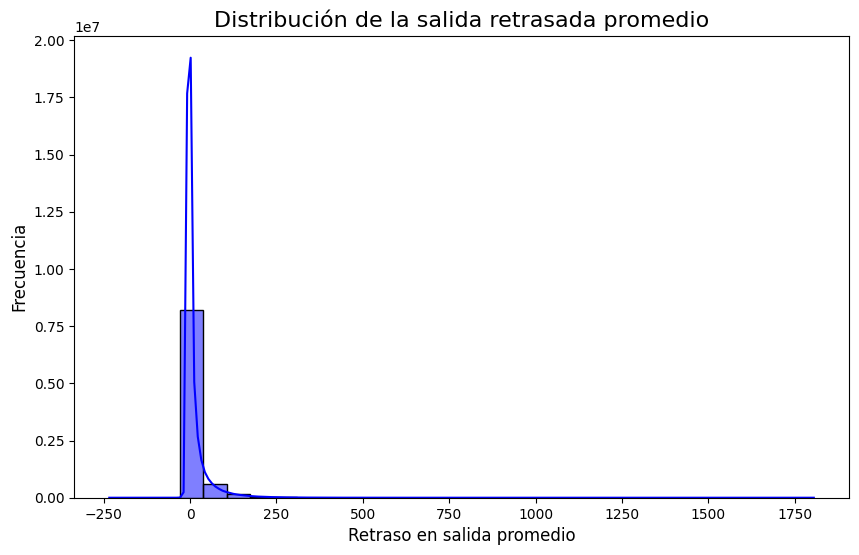

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY'], bins=30, kde=True, color='blue')

plt.title('Distribución de retrasos promedio', fontsize=16)
plt.xlabel('Retraso', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=30, kde=True, color='blue')

# Añadir título y etiquetas
plt.title('Distribución de la salida retrasada promedio', fontsize=16)
plt.xlabel('Retraso en salida promedio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['año'] = df['FL_DATE'].dt.year
años_diferentes = df['año'].nunique()
print(f"Número de años diferentes en la columna 'FL_DATE': {años_diferentes}")

Número de años diferentes en la columna 'FL_DATE': 9


<Axes: ylabel='TAXI_OUT'>

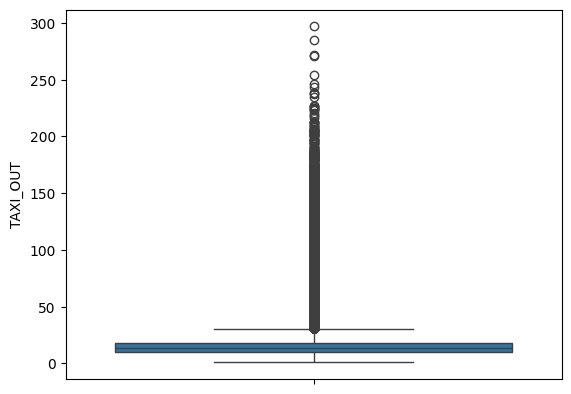

In [ ]:
sns.boxplot(data=df['TAXI_OUT'])

<Axes: >

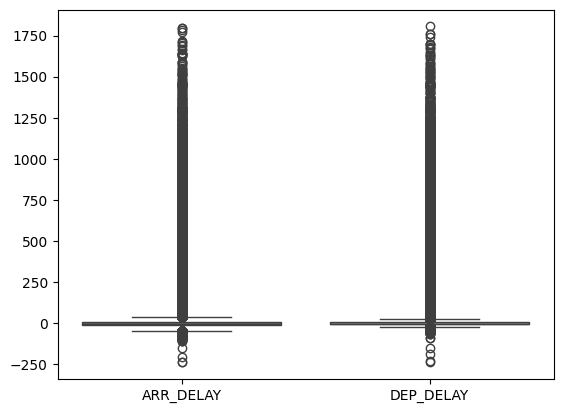

In [ ]:
sns.boxplot(data=df[['ARR_DELAY', 'DEP_DELAY']])

In [ ]:
Q1 = df['ARR_DELAY'].quantile(0.25)
Q3 = df['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['ARR_DELAY'] < limite_inferior) | (df['ARR_DELAY'] > limite_superior)]
len(outliers)

801302

In [ ]:
Q1 = df['DEP_DELAY'].quantile(0.25)
Q3 = df['DEP_DELAY'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['DEP_DELAY'] < limite_inferior) | (df['DEP_DELAY'] > limite_superior)]
len(outliers)

1122161

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

numericas = df[['DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'TAXI_OUT', 'DEP_TIME']]

scaler = StandardScaler()
numericas_escaladas = scaler.fit_transform(numericas)

pca = PCA(n_components=0.95)
pca_resultados = pca.fit_transform(numericas_escaladas)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Componentes principales:\n", pca_resultados)

Varianza explicada por cada componente: [0.40829226 0.223972   0.21034696 0.10575924 0.03812491]
Componentes principales:
 [[-0.52334594  1.28756385  0.97967184 -0.51333268  0.17873457]
 [ 2.95532107 -0.50425882 -1.17524859  0.3069688   0.03692575]
 [ 0.30953426 -0.47966003  0.03783393  1.13773809 -0.10361371]
 ...
 [ 0.51782139  0.18765767  0.80038007 -0.73686634 -0.07700466]
 [-2.49659977  3.94006664 -1.0199154  -1.11506413 -0.0552074 ]
 [ 1.12616172 -0.51317442 -0.38591168  0.25740565  0.10718366]]


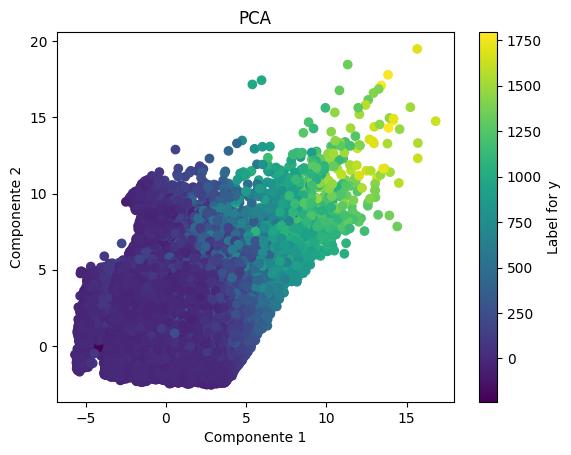

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[['DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'TAXI_OUT', 'DEP_TIME']]
y = df['ARR_DELAY']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_PCA = pca.fit_transform(X_scaled)



plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)
plt.title('PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Label for y')
plt.show()

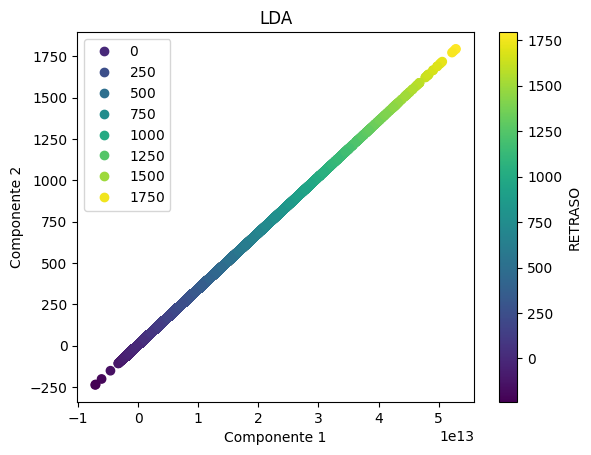

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = df[['DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'TAXI_OUT', 'DEP_TIME']]
y = df['ARR_DELAY']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=2)
X_LDA = lda.fit_transform(X_scaled, y)

scatter = plt.scatter(X_LDA[:, 0], y, c=y)
plt.title('LDA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='RETRASO')
plt.legend(*scatter.legend_elements())
plt.show()

In [ ]:
aerolineas = df['OP_CARRIER'].unique()

for aerolinea in aerolineas:
    aero_data = df[df['OP_CARRIER'] == aerolinea]
    destinos = aero_data['DEST'].nunique()
    origenes = aero_data['ORIGIN'].nunique()
    print(f"Aerolínea: {aerolinea}")
    print(f"Destinos únicos: {destinos}")
    print(f"Orígenes únicos: {origenes}")
    print()

Aerolínea: AA
Destinos únicos: 111
Orígenes únicos: 110

Aerolínea: XE
Destinos únicos: 129
Orígenes únicos: 128

Aerolínea: OH
Destinos únicos: 112
Orígenes únicos: 111

Aerolínea: OO
Destinos únicos: 264
Orígenes únicos: 263

Aerolínea: WN
Destinos únicos: 91
Orígenes únicos: 91

Aerolínea: EV
Destinos únicos: 200
Orígenes únicos: 198

Aerolínea: YV
Destinos únicos: 137
Orígenes únicos: 135

Aerolínea: NW
Destinos únicos: 99
Orígenes únicos: 100

Aerolínea: UA
Destinos únicos: 114
Orígenes únicos: 115

Aerolínea: MQ
Destinos únicos: 166
Orígenes únicos: 166

Aerolínea: F9
Destinos únicos: 106
Orígenes únicos: 107

Aerolínea: US
Destinos únicos: 91
Orígenes únicos: 91

Aerolínea: FL
Destinos únicos: 75
Orígenes únicos: 75

Aerolínea: CO
Destinos únicos: 75
Orígenes únicos: 78

Aerolínea: AS
Destinos únicos: 73
Orígenes únicos: 73

Aerolínea: DL
Destinos únicos: 169
Orígenes únicos: 170

Aerolínea: B6
Destinos únicos: 68
Orígenes únicos: 68

Aerolínea: HA
Destinos únicos: 17
Orígenes ú

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 8px; text-align:center">
  <h2>Conslusión de análisis exploratorio</h2>
  <h2>En general la distribución de los datos es buena, no requieren de tratamientos mayores para su procesamiento, el mayor inconveniente detectado es la gran cantidad de datos, por lo cual, se optará por la selección de una muestra característica del conjunto. Se han detectado características relacionables como es el numero de vuelo, los origenes y destinos únicos por aerolinea y la cantidad de repeticiones más comunes. Estas consideraciones pueden mejorar el procesamiento que se hace a los datos previo al desarrollo de los modelos.</h2>
</div>

# Limpieza de datos

Ya que se cuenta con un panorama completo de los datos y su distribución, se procede con la limpieza. El primer proceso consiste en la eliminación de los duplicados. Posteriormenre, y debido a que en el PCA se detectó que el número ideal de componentes como 4, se tomo este criterio para su aplicación. Adicionalmente se eliminaron los valores atípicos detectados para las columnas de interés.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_limpio = df.drop_duplicates()

def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df

columnas_outliers = ['ARR_DELAY', 'DEP_DELAY', 'TAXI_OUT']
df_limpio = eliminar_outliers(df_limpio, columnas_outliers)

X = df_limpio[['DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'TAXI_OUT', 'DEP_TIME']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

print("Componentes principales:\n", X_pca)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_final = pd.concat([df_limpio.reset_index(drop=True), df_pca], axis=1)

print(df_final.head())

Componentes principales:
 [[ 3.33572749 -0.12727165 -0.72378492  0.67086285]
 [ 0.54073106 -0.35333499  1.20866199  2.14096654]
 [-2.10272734 -1.68484901 -0.3595073   0.60817595]
 ...
 [ 3.67702808 -0.00823656  2.21907388  0.72064439]
 [-2.25304414  4.11077059 -0.45368905 -1.42138292]
 [ 1.47954732 -0.32271022  0.78037399  0.30427289]]
      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2009-05-08         XE               2926    IAH  ELP        2115.0   
1  2009-03-16         OH               6433    CVG  DSM        1430.0   
2  2009-03-04         OO               5439    LAX  SBA         820.0   
3  2009-06-12         WN                615    LAS  MCI        1235.0   
4  2009-08-04         WN                 94    OAK  PHX         600.0   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  ARR_DELAY  \
0    2112.0       -3.0      17.0      2129.0        2219.0      -15.0   
1    1425.0       -5.0      25.0      1450.0        1518.0        7.0   
2   

# Extracción y selección de carcterísticas


Durante el análisis exploratorio se identificaron valores relacionables entre sí como es los destinos únicos de origen y destino para las diferentes aerolíneas. Esto implicá la transformación de características categóricas a numericas para los casos de aerolinea, destino y origen.

NOTA: Se tomó una muestra aleatoria de los datos limpios para los procesamientos posteriores debido a que por la gran cantidad disponible el procesamiento se vuelve tardado y en ocaciones no se puede realizar efectivamente (mata el kernel).

Se aplicó un muestreo estratificado al conservando el 20 % de los datos.

In [ ]:
datos, _ = train_test_split(df_limpio, test_size=0.8, stratify=df_final['ARR_DELAY'], random_state=42)
print(f'Tamaño de la muestra estratificada: {datos.shape}')

Tamaño de la muestra estratificada: (1402178, 14)


Se aplicó una codificación de las variables categóricas de Aerolínea, Origen y Destino utilizando el valor de la media de la variable objetivo

In [ ]:
medialinea = datos.groupby('OP_CARRIER')['ARR_DELAY'].mean()
mediaorigen = datos.groupby('ORIGIN')['ARR_DELAY'].mean()
mediadest = datos.groupby('DEST')['ARR_DELAY'].mean()

datos['OP_CARRIER_CODIFICADO'] = datos['OP_CARRIER'].map(medialinea)
datos['ORIGIN_TARGET_COFIFICADO'] = datos['ORIGIN'].map(mediaorigen)
datos['DEST_TARGET_CODIFICADO'] = datos['DEST'].map(mediadest)

print(datos.head())

            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
1499179  2010-11-15         WN                489    MCO  FLL        1550.0   
2681849  2011-02-01         CO                208    PDX  IAH        2350.0   
7450641  2016-04-23         WN               3760    LAX  RNO        1940.0   
7102482  2016-09-08         AA               2591    BOS  ORD        1630.0   
1741494  2010-02-14         WN                921    PHX  AUS         905.0   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  ARR_DELAY  \
1499179    1605.0       15.0       8.0      1613.0        1645.0        8.0   
2681849    2341.0       -9.0      11.0      2352.0         537.0       -6.0   
7450641    1939.0       -1.0      10.0      1949.0        2055.0       -3.0   
7102482    1621.0       -9.0      26.0      1647.0        1824.0       -6.0   
1741494     906.0        1.0      10.0       916.0        1215.0       -7.0   

         CRS_ELAPSED_TIME  DISTANCE ARR_DELAY_Cate

Se agrega la categorización de la variable objetivo.

In [ ]:
conditions = [
    datos['ARR_DELAY'] < -15,
    datos['ARR_DELAY'] > 15,
    (datos['ARR_DELAY'] >= -15) & (datos['ARR_DELAY'] <= 15)
]
values = ['Early', 'Delay', 'On time']

datos['ARR_DELAY_Category'] = np.select(conditions, values)
print(datos['ARR_DELAY_Category'].value_counts())

ARR_DELAY_Category
On time    1049326
Early       310899
Delay        41953
Name: count, dtype: int64


# MODELOS DE INFERENCIA
### 1. REGRESIÓN LOGÍSTICA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, f1_score

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE','OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Reporte de clasificación con métricas
report = classification_report(y_test, y_pred, target_names=['Early', 'On time', 'Delay'])
print("Reporte de clasificación:\n", report)

# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 Score (Macro):", f1_macro)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
 [[  5744   1141   1506]
 [  4814  45336  12030]
 [ 49503  50218 110144]]
Reporte de clasificación:
               precision    recall  f1-score   support

       Early       0.10      0.68      0.17      8391
     On time       0.47      0.73      0.57     62180
       Delay       0.89      0.52      0.66    209865

    accuracy                           0.57    280436
   macro avg       0.49      0.65      0.47    280436
weighted avg       0.77      0.57      0.63    280436

F1 Score (Macro): 0.4663276906178893


# SUBPROCESAMIENTO

El resultado de la regresión logística indica que el modelo no rinde como era esperado, por lo cual se procede con análisis y procesamientos adicionales que permitan mejorar las métricas. Se detectó un sesgo hacia los datos de OnTime después de la categorización, por lo cual se procede a realizar un conteo y con base en ese dato, se procederá a realizar el muestreo.

In [ ]:
total_filas = len(df_limpio)
delay_filas = len(df_limpio[df_limpio['ARR_DELAY_Category'] == 'Delay'])

porcentaje_delay = (delay_filas / total_filas) * 100

print(f'Porcentaje de la clase "Delay" en el DataFrame: {porcentaje_delay:.2f}%')
num_delay = len(df_limpio[df_limpio['ARR_DELAY_Category'] == 'Delay'])
print(f'Número de muestras para la clase "Delay": {num_delay}')

Porcentaje de la clase "Delay" en el DataFrame: 2.99%
Número de muestras para la clase "Delay": 209761


In [ ]:
total_rows = len(df_limpio)
sample_size = int(total_rows * 0.03)

df_on_time = df_limpio[df_limpio['ARR_DELAY_Category'] == 'On time']
df_early = df_limpio[df_limpio['ARR_DELAY_Category'] == 'Early']
df_delay = df_limpio[df_limpio['ARR_DELAY_Category'] == 'Delay']

sample_on_time = min(sample_size, len(df_on_time))
sample_early = min(sample_size, len(df_early))
sample_delay = min(sample_size, len(df_delay))

df_on_time_sample = df_on_time.sample(n=sample_on_time, random_state=42)
df_early_sample = df_early.sample(n=sample_early, random_state=42)
df_delay_sample = df_delay.sample(n=sample_delay, random_state=42)

datos = pd.concat([df_on_time_sample, df_early_sample, df_delay_sample])

print(datos['ARR_DELAY_Category'].value_counts(normalize=True))

ARR_DELAY_Category
On time    0.333632
Early      0.333632
Delay      0.332736
Name: proportion, dtype: float64


In [ ]:
print (datos.head())

            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
1499179  2010-11-15         WN                489    MCO  FLL        1550.0   
2681849  2011-02-01         CO                208    PDX  IAH        2350.0   
7450641  2016-04-23         WN               3760    LAX  RNO        1940.0   
7102482  2016-09-08         AA               2591    BOS  ORD        1630.0   
1741494  2010-02-14         WN                921    PHX  AUS         905.0   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  ARR_DELAY  \
1499179    1605.0       15.0       8.0      1613.0        1645.0        8.0   
2681849    2341.0       -9.0      11.0      2352.0         537.0       -6.0   
7450641    1939.0       -1.0      10.0      1949.0        2055.0       -3.0   
7102482    1621.0       -9.0      26.0      1647.0        1824.0       -6.0   
1741494     906.0        1.0      10.0       916.0        1215.0       -7.0   

         CRS_ELAPSED_TIME  DISTANCE ARR_DELAY_Cate

Este nuevo análsis de las carcaterísticas de los datos y su distribución permiten identificar su comportamiento en la base de datos.

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 8px; text-align:center">
  <h2>Nota: con el fin de afinar el modelo se unifican los procesamientos a los datos que mejoran las metricas de los modelos de clasificación en un sólo código.</h2>

# PROCESAMIENTO
### Normalización y limpieza de datos

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/train_airlines_delay_challenge (1).csv')
df_limpio = df.drop_duplicates()

def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df

columnas_outliers = ['ARR_DELAY', 'DEP_DELAY', 'TAXI_OUT']
df_limpio = eliminar_outliers(df_limpio, columnas_outliers)

X = df_limpio[['DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'TAXI_OUT', 'DEP_TIME']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_limpio = pd.concat([df_limpio.reset_index(drop=True), df_pca], axis=1)

conditions = [
    df_limpio['ARR_DELAY'] < -15,
    df_limpio['ARR_DELAY'] > 15,
    (df_limpio['ARR_DELAY'] >= -15) & (df_limpio['ARR_DELAY'] <= 15)
]
values = ['Early', 'Delay', 'On time']
df_limpio['ARR_DELAY_Category'] = np.select(conditions, values)

sample_size = int(len(df_limpio) * 0.03)

df_on_time = df_limpio[df_limpio['ARR_DELAY_Category'] == 'On time']
df_early = df_limpio[df_limpio['ARR_DELAY_Category'] == 'Early']
df_delay = df_limpio[df_limpio['ARR_DELAY_Category'] == 'Delay']

df_on_time_sample = df_on_time.sample(n=min(sample_size, len(df_on_time)), random_state=42)
df_early_sample = df_early.sample(n=min(sample_size, len(df_early)), random_state=42)
df_delay_sample = df_delay.sample(n=min(sample_size, len(df_delay)), random_state=42)

datos = pd.concat([df_on_time_sample, df_early_sample, df_delay_sample])
datos['CRS_DEP_TIME'] = (datos['CRS_DEP_TIME'] // 100) * 60 + (datos['CRS_DEP_TIME'] % 100)
datos['DEP_TIME'] = (datos['DEP_TIME'] // 100) * 60 + (datos['DEP_TIME'] % 100)
datos['WHEELS_OFF'] = (datos['WHEELS_OFF'] // 100) * 60 + (datos['WHEELS_OFF'] % 100)
datos['CRS_ARR_TIME'] = (datos['CRS_ARR_TIME'] // 100) * 60 + (datos['CRS_ARR_TIME'] % 100)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(datos['ARR_DELAY_Category'].value_counts(normalize=True))
num_filas = len(datos)
print(f'Número de filas: {num_filas}')
print(datos.head())


ARR_DELAY_Category
On time    0.333632
Early      0.333632
Delay      0.332736
Name: proportion, dtype: float64
Número de filas: 630413
            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
1167680  2010-11-15         WN                489    MCO  FLL         950.0   
2094980  2011-02-01         CO                208    PDX  IAH        1430.0   
5807682  2016-04-23         WN               3760    LAX  RNO        1180.0   
5533411  2016-09-08         AA               2591    BOS  ORD         990.0   
1357679  2010-02-14         WN                921    PHX  AUS         545.0   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  ARR_DELAY  \
1167680     965.0       15.0       8.0       973.0        1005.0        8.0   
2094980    1421.0       -9.0      11.0      1432.0         337.0       -6.0   
5807682    1179.0       -1.0      10.0      1189.0        1255.0       -3.0   
5533411     981.0       -9.0      26.0      1007.0        1104.0       -6

# MODELOS DE INFERENCIA
### 1. REGRESIÓN LOGÍSTICA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(max_iter=3000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Matriz de confusión:
[[42214     0     0]
 [    0 41939     0]
 [  209     0 41721]]
F1-score macro: 0.9983440516671241
Sensibilidad (Recall): 0.9983385006757294
Especificidad (macro): 0.9983385006757294


### VALIDACIÓN CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

n_pliegues = 5

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(max_iter=3000))
])

scores = cross_val_score(pipeline, X, y, cv=n_pliegues, scoring='f1_macro')

print(f"F1-scores para cada pliegue: {scores}")
print(f"F1-score promedio: {scores.mean()} ± {scores.std()}")

F1-scores para cada pliegue: [0.99821465 0.99824638 0.99815912 0.99816701 0.9981829 ]
F1-score promedio: 0.9981940150915865 ± 3.2368786931060075e-05


### 2. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

X = datos.drop(columns=['ARR_DELAY_Category'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)


Matriz de confusión:
[[42199     0    15]
 [    0 41926    13]
 [   10     5 41915]]
F1-score macro: 0.9996588581404993
Sensibilidad (Recall): 0.9996589848489918
Especificidad (macro): 0.9996589848489918


### VALIDACIÓN CRUZADA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score

n_pliegues = 5

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42))
])

y_pred = cross_val_predict(pipeline, X, y, cv=n_pliegues)

f1 = f1_score(y, y_pred, average='macro')
accuracy = accuracy_score(y, y_pred)
sensitivity = recall_score(y, y_pred, average='macro')
cm = confusion_matrix(y, y_pred)

print("Matriz de confusión:")
print(cm)
print(f"F1-score macro: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Sensibilidad (Recall): {sensitivity}")

Matriz de confusión:
[[209673      0     88]
 [     0 210272     54]
 [   102     24 210200]]
F1-score macro: 0.9995748656962804
Accuracy: 0.9995748818631596
Sensibilidad (Recall): 0.9995748868713816


### 3. Máquinas de soporte vectorial (SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVC())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)




Matriz de confusión:
[[42214     0     0]
 [    0 41939     0]
 [  284   167 41479]]
F1-score macro: 0.9964177810768379
Sensibilidad (Recall): 0.9964146593528898
Especificidad (macro): 0.9964146593528898


### 4. Aprendizaje basado en árboles de decisión (C4.5)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(criterion='entropy'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)



Matriz de confusión:
[[42214     0     0]
 [    0 41939     0]
 [    0     0 41930]]
F1-score macro: 1.0
Sensibilidad (Recall): 1.0
Especificidad (macro): 1.0


### VALIDACIÓN CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

n_pliegues = 5

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(criterion='entropy'))
])

y_pred = cross_val_predict(pipeline, X, y, cv=n_pliegues)

f1 = f1_score(y, y_pred, average='macro')
accuracy = accuracy_score(y, y_pred)
sensitivity = recall_score(y, y_pred, average='macro')
cm = confusion_matrix(y, y_pred)

print("Matriz de confusión:")
print(cm)
print(f"F1-score macro: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Sensibilidad (Recall): {sensitivity}")

Matriz de confusión:
[[209761      0      0]
 [     0 210326      0]
 [     0      0 210326]]
F1-score macro: 1.0
Accuracy: 1.0
Sensibilidad (Recall): 1.0


### ¡RIESGO DE SOBREAJUSTE!

### 6. Aprendizaje Bayesiano

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('naive_bayes', GaussianNB())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Matriz de confusión:
[[ 8353     0   107]
 [    0 41169   867]
 [ 1301  3846 36878]]
F1-score macro: 0.9304996906934075
Sensibilidad (Recall): 0.9480841166714282
Especificidad (macro): 0.9480841166714282


### 7. Aprendizaje basado en instancias (KNN - K-Nearest Neighbors)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)


Matriz de confusión:
[[ 8236     0   224]
 [    0 41422   614]
 [  588  2550 38887]]
F1-score macro: 0.955865590999669
Sensibilidad (Recall): 0.9614153638364639
Especificidad (macro): 0.9614153638364639


### Gráfico de rendimiento del modelo KNN

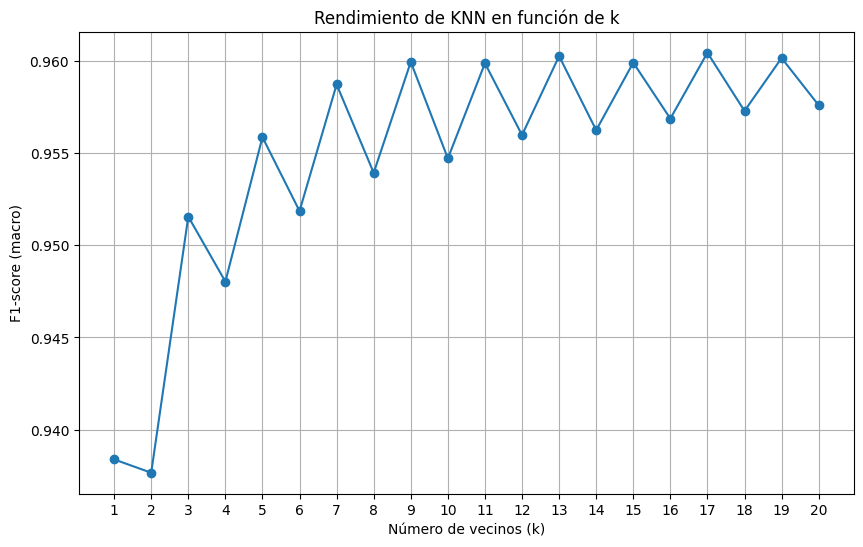

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

k_values = range(1, 21)
f1_scores = []

for k in k_values:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.title('Rendimiento de KNN en función de k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('F1-score (macro)')
plt.xticks(k_values)
plt.grid()
plt.show()


### 8. Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Matriz de confusión:
[[42214     0     0]
 [    0 41939     0]
 [    0     0 41930]]
F1-score macro: 1.0
Sensibilidad (Recall): 1.0
Especificidad (macro): 1.0


#### RIESGO DE SOBREAJUSTE

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))
])
from sklearn.model_selection import cross_val_score

n_pliegues = 5

f1_scores = cross_val_score(pipeline, X, y, cv=n_pliegues, scoring='f1_macro')

print(f"F1-scores por pliegue: {f1_scores}")
print(f"F1-score promedio: {f1_scores.mean()}")
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, confusion_matrix

y_pred = cross_val_predict(pipeline, X, y, cv=n_pliegues)

sensitivity = recall_score(y, y_pred, average='macro')

cm = confusion_matrix(y, y_pred)

print(f"Sensibilidad (Recall): {sensitivity}")
print("Matriz de confusión:")
print(cm)


### 9. Regresión lineal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = datos.drop(columns=['ARR_DELAY', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1, max_iter=10000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

def predecir_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Mean Squared Error: 0.2662823895214786
R-squared: 0.9992690478604519


### 10. Bootstrap Aggregating

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

estimator = DecisionTreeClassifier(criterion='entropy', random_state=42)
bagging = BaggingClassifier(estimator=estimator, n_estimators=50, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('bagging', bagging)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Matriz de confusión:
[[42214     0     0]
 [    0 41939     0]
 [    0     0 41930]]
F1-score macro: 1.0
Sensibilidad (Recall): 1.0
Especificidad (macro): 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = datos.drop(columns=['ARR_DELAY_Category', 'FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

estimator = LogisticRegression(max_iter=3000, random_state=42)
bagging = BaggingClassifier(estimator=estimator, n_estimators=50, random_state=42)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('bagging', bagging)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Matriz de confusión:
[[42214     0     0]
 [    0 41939     0]
 [  223     0 41707]]
F1-score macro: 0.9982331234045759
Sensibilidad (Recall): 0.9982272040702759
Especificidad (macro): 0.9982272040702759


Prueba sin los componentes principales

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

X = datos.drop(columns=['ARR_DELAY_Category', 'PC1', 'PC2', 'PC3', 'PC4'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Codigo con componentes principales

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

X = datos[['OP_CARRIER', 'ORIGIN', 'DEST', 'PC1', 'PC2', 'PC3', 'PC4']]
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

Matriz de confusión:
[[40198     5  2011]
 [    6 38547  3386]
 [ 4324  4968 32638]]
F1-score macro: 0.881754818157568
Sensibilidad (Recall): 0.8832521727337506
Especificidad (macro): 0.8832521727337506


### CONCLUSIÓN

Los modelos de árboles de decisión y los ensambles con árboles de decisión como estimador principal mostraron un rendimiento perfecto, con métricas de F1, Sensibilidad y Especificidad de 1, además de matrices sin errores. Este rendimiento podría indicar que el modelo se sobreajustó a los datos de entrenamiento. Esto se confirmó con el uso del modelo de ensamble Bagging (Bootstrap Aggregating), que, al ser entrenado con un árbol de decisión como estimador, mostró una mejora significativa en comparación con el uso de regresión logística. Los modelos de ensamble, como Random Forest, demostraron un rendimiento superior a otros modelos como SVM, que, además de tener métricas ligeramente inferiores, requirieron un tiempo de procesamiento considerablemente mayor. Asimismo, el análisis de componentes principales resultó ser menos efectivo para el modelo, ya que las métricas generadas con estos datos fueron significativamente inferiores a las obtenidas con Random Forest.

### PRUEBA CON DATOS SIN ETIQUETA DEL MODELO QUE DEMOSTRÓ MEJOR RENDIMIENTO (RANDOM FOREST)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

df = pd.read_csv('/content/drive/My Drive/train_airlines_delay_challenge (1).csv')
df_limpio = df.drop_duplicates()

def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df

columnas_outliers = ['ARR_DELAY', 'DEP_DELAY', 'TAXI_OUT']
df_limpio = eliminar_outliers(df_limpio, columnas_outliers)

X = df_limpio[['DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'TAXI_OUT', 'DEP_TIME']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_limpio = pd.concat([df_limpio.reset_index(drop=True), df_pca], axis=1)

conditions = [
    df_limpio['ARR_DELAY'] < -15,
    df_limpio['ARR_DELAY'] > 15,
    (df_limpio['ARR_DELAY'] >= -15) & (df_limpio['ARR_DELAY'] <= 15)
]
values = ['Early', 'Delay', 'On time']
df_limpio['ARR_DELAY_Category'] = np.select(conditions, values)

sample_size = int(len(df_limpio) * 0.03)
df_on_time = df_limpio[df_limpio['ARR_DELAY_Category'] == 'On time']
df_early = df_limpio[df_limpio['ARR_DELAY_Category'] == 'Early']
df_delay = df_limpio[df_limpio['ARR_DELAY_Category'] == 'Delay']

df_on_time_sample = df_on_time.sample(n=min(sample_size, len(df_on_time)), random_state=42)
df_early_sample = df_early.sample(n=min(sample_size, len(df_early)), random_state=42)
df_delay_sample = df_delay.sample(n=min(sample_size, len(df_delay)), random_state=42)

datos = pd.concat([df_on_time_sample, df_early_sample, df_delay_sample])

datos['CRS_DEP_TIME'] = (datos['CRS_DEP_TIME'] // 100) * 60 + (datos['CRS_DEP_TIME'] % 100)
datos['DEP_TIME'] = (datos['DEP_TIME'] // 100) * 60 + (datos['DEP_TIME'] % 100)
datos['WHEELS_OFF'] = (datos['WHEELS_OFF'] // 100) * 60 + (datos['WHEELS_OFF'] % 100)
datos['CRS_ARR_TIME'] = (datos['CRS_ARR_TIME'] // 100) * 60 + (datos['CRS_ARR_TIME'] % 100)

X = datos.drop(columns=['ARR_DELAY_Category', 'PC1', 'PC2', 'PC3', 'PC4'])
y = datos['ARR_DELAY_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
print(f"F1-score macro: {f1_macro}")

sensitivity = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
print(f"Sensibilidad (Recall): {sensitivity}")

cm = confusion_matrix(y_test, y_pred)
specificity = cm.diagonal() / cm.sum(axis=1)
specificity_macro = specificity.mean()
print(f"Especificidad (macro): {specificity_macro}")

def clasificar_nuevos_datos(nuevos_datos):
    return pipeline.predict(nuevos_datos)

In [ ]:
nuevos_datos = pd.read_csv('//content/drive/My Drive/test_airlines_delay_challenge.csv')
print(nuevos_datos.head())

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2018-07-13         B6                574    TPA  EWR           929   
1  2018-09-11         UA                256    DEN  SFO           750   
2  2018-07-22         WN               3252    AUS  PHX          1710   
3  2018-04-30         AA               1422    BOS  JFK          1440   
4  2018-05-09         WN                187    HOU  ATL           710   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  CRS_ELAPSED_TIME  \
0     924.0       -5.0      13.0       937.0          1215             166.0   
1     750.0        0.0      18.0       808.0           928             158.0   
2    1820.0       70.0       8.0      1828.0          1730             140.0   
3    1431.0       -9.0      17.0      1448.0          1607              87.0   
4     709.0       -1.0      11.0       720.0          1010             120.0   

   DISTANCE  
0     997.0  
1     967.0  
2     872.0  
3     187.0  
4     696.

# PRUEBA DE RENDIMIENTO CON EL MODELO FINAL (YGGDRASIL)
### Entrenamiento de YGGDRASIL

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

datos_sample = datos.sample(frac=0.5, random_state=42)

X = datos_sample.drop(columns=['ARR_DELAY_Category', 'PC1', 'PC2', 'PC3', 'PC4'])
y = datos_sample['ARR_DELAY_Category']

num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline.fit(X, y)

regression_features = ['DEP_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'TAXI_OUT', 'DEP_TIME']
X_reg = datos_sample[regression_features]
y_reg = datos_sample['ARR_DELAY']

reg_pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

reg_pipeline.fit(X_reg, y_reg)

def clasificar_nuevos_datos(nuevos_datos):
    if 'ARR_DELAY' not in nuevos_datos.columns:
        nuevos_datos['ARR_DELAY'] = reg_pipeline.predict(nuevos_datos[regression_features])

    conditions = [
        nuevos_datos['ARR_DELAY'] < -15,
        nuevos_datos['ARR_DELAY'] > 15,
        (nuevos_datos['ARR_DELAY'] >= -15) & (nuevos_datos['ARR_DELAY'] <= 15)
    ]
    values = ['Early', 'Delay', 'On time']
    nuevos_datos['ARR_DELAY_Category'] = np.select(conditions, values)

    return pipeline.predict(nuevos_datos)

In [ ]:
nuevos_datos = pd.read_csv('//content/drive/My Drive/test_airlines_delay_challenge.csv')
factor = 0.524006891451514
nuevos_datos['ARR_DELAY'] = nuevos_datos['DEP_DELAY'] * factor
nuevos_datos['CRS_DEP_TIME'] = (nuevos_datos['CRS_DEP_TIME'] // 100) * 60 + (nuevos_datos['CRS_DEP_TIME'] % 100)
nuevos_datos['DEP_TIME'] = (nuevos_datos['DEP_TIME'] // 100) * 60 + (nuevos_datos['DEP_TIME'] % 100)
nuevos_datos['WHEELS_OFF'] = (nuevos_datos['WHEELS_OFF'] // 100) * 60 + (nuevos_datos['WHEELS_OFF'] % 100)
nuevos_datos['CRS_ARR_TIME'] = (nuevos_datos['CRS_ARR_TIME'] // 100) * 60 + (nuevos_datos['CRS_ARR_TIME'] % 100)

X_nuevos = nuevos_datos[['DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'DISTANCE',
                           'CRS_ELAPSED_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF',
                           'TAXI_OUT', 'DEP_TIME','ORIGIN', 'FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'DEST']]
nuevas_predicciones = clasificar_nuevos_datos(X_nuevos)

nuevos_datos['ARR_DELAY_Category_Predicted'] = nuevas_predicciones

print(nuevos_datos[['DEP_DELAY', 'ARR_DELAY', 'ARR_DELAY_Category_Predicted']])
nuevos_datos[['ARR_DELAY', 'ARR_DELAY_Category_Predicted']].to_csv('/content/drive/My Drive/ResultadosPredicciones.csv', index=False)

         DEP_DELAY  ARR_DELAY ARR_DELAY_Category_Predicted
0             -5.0  -2.620034                      On time
1              0.0   0.000000                      On time
2             70.0  36.680482                        Delay
3             -9.0  -4.716062                      On time
4             -1.0  -0.524007                      On time
...            ...        ...                          ...
2249995       -2.0  -1.048014                      On time
2249996       -3.0  -1.572021                      On time
2249997       -3.0  -1.572021                      On time
2249998        2.0   1.048014                      On time
2249999       -5.0  -2.620034                      On time

[2250000 rows x 3 columns]
